In [25]:
# Importing the dataset

import pandas as pd
dataset = pd.read_csv('Attrition.csv')
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [27]:
# identify constants
constants = [
    val for val in dataset.columns if len(dataset[val].fillna(0).unique()) == 1
]

constants

['EmployeeCount', 'Over18', 'StandardHours']

In [28]:
# identify quasi constant values (sometimes these may be boolean features)
for val in dataset.columns.sort_values():
    if (len(dataset[val].unique()) < 3):
        print(dataset[val].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64
EmployeeCount
1    1470
Name: count, dtype: int64
Gender
Male      882
Female    588
Name: count, dtype: int64
Over18
Y    1470
Name: count, dtype: int64
OverTime
No     1054
Yes     416
Name: count, dtype: int64
PerformanceRating
3    1244
4     226
Name: count, dtype: int64
StandardHours
80    1470
Name: count, dtype: int64


In [29]:
# identify duplicate rows
dataset[dataset.duplicated(keep=False)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [30]:
# drop duplicate rows
dataset.drop_duplicates(inplace=True)

In [31]:
# check of duplicate columns
duplicate_variables = []
for i in range(0, len(dataset.columns)):
    orig = dataset.columns[i]

    for dupe in dataset.columns[i + 1:]:
        if dataset[orig].equals(dataset[dupe]):
            duplicate_variables.append(dupe)
            print(f'{orig} looks the same as {dupe}')

duplicate_variables

[]

In [32]:
# drop the variables that are duplicated or low in variance
dataset.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [33]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

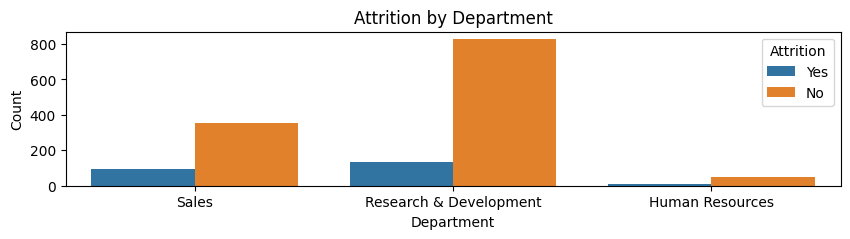

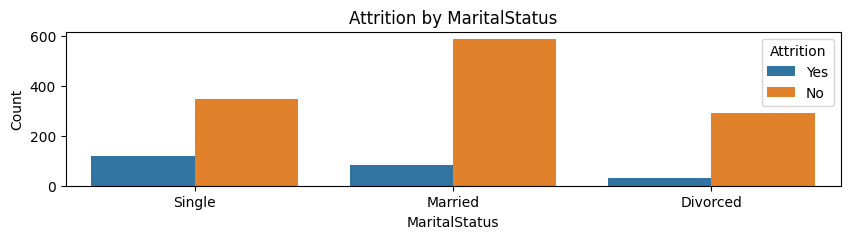

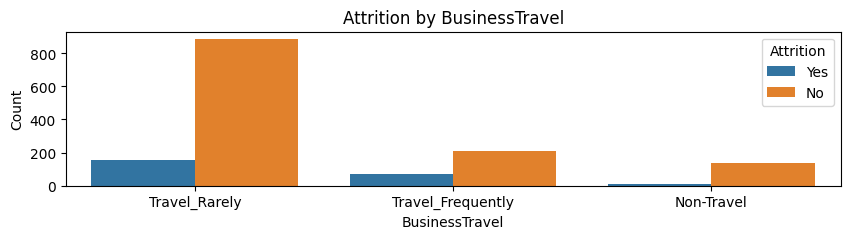

In [34]:
# List of categorical features
import matplotlib.pyplot as plt
import seaborn as sns
categorical_features = ['Department', 'MaritalStatus', 'BusinessTravel']

# Plot bar plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 2))
    sns.countplot(x=feature, hue='Attrition', data=dataset)
    plt.title(f'Attrition by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

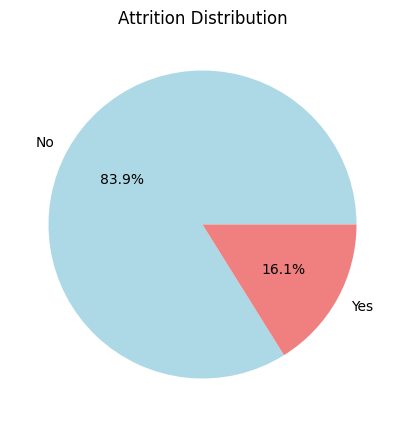

In [35]:
# Plot pie chart for attrition distribution
plt.figure(figsize=(8, 5))
dataset['Attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Attrition Distribution')
plt.ylabel('')
plt.show()

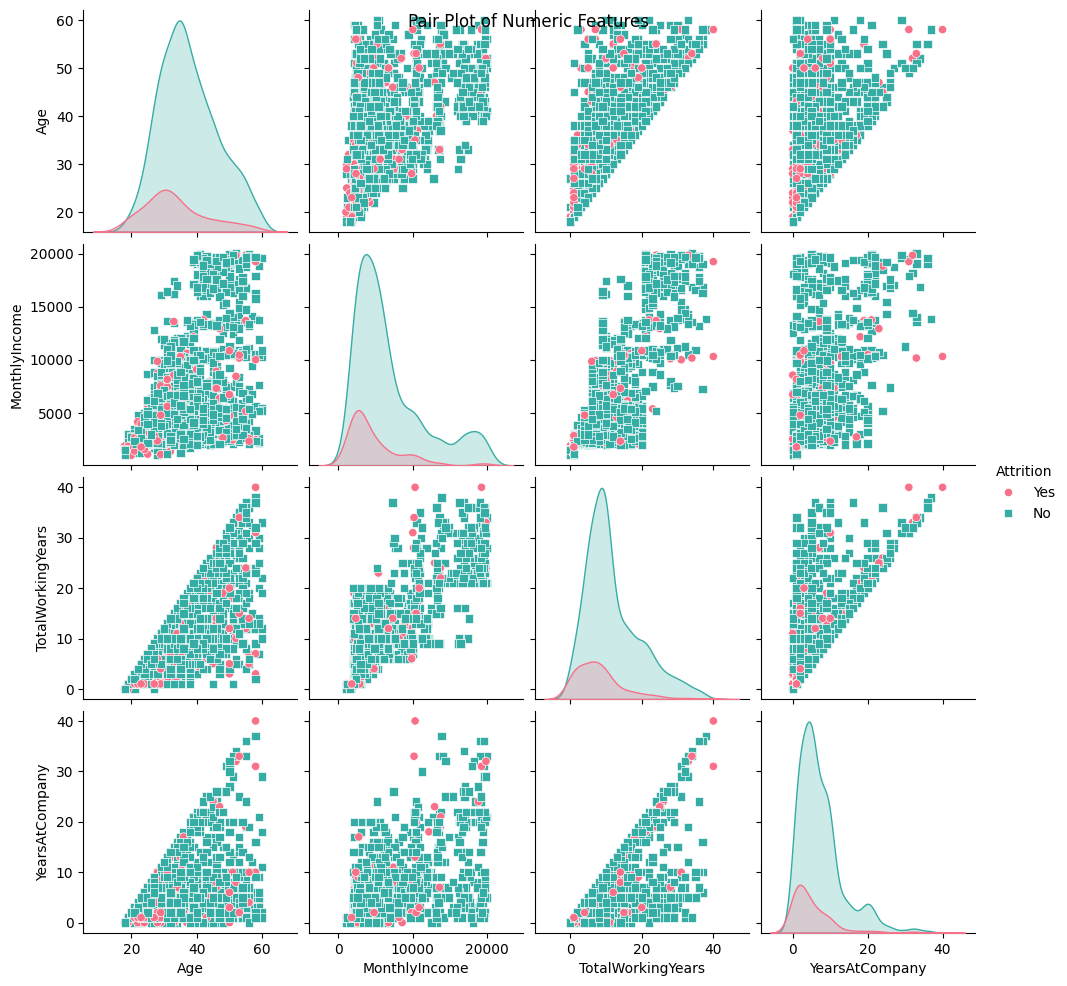

In [36]:

# Sample a subset of numeric features
numeric_features_subset = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']

# Plot pair plot
sns.pairplot(dataset, hue='Attrition', vars=numeric_features_subset, diag_kind='kde', markers=['o', 's'], palette='husl')
plt.suptitle('Pair Plot of Numeric Features')
plt.show()

In [37]:
import pandas as pd
import numpy as np
num_samples = 1680
data = {
    'Age': np.random.choice(range(18, 65), num_samples),
    'Attrition': np.random.choice(['Yes', 'No'], num_samples),
    'BusinessTravel': np.random.choice(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], num_samples),
    'DailyRate': np.random.randint(100, 1500, num_samples),
    'Department': np.random.choice(['Sales', 'Research & Development', 'Human Resources'], num_samples),
    'DistanceFromHome': np.random.randint(1, 31, num_samples),
    'Education': np.random.choice([1, 2, 3, 4, 5], num_samples),
    'EducationField': np.random.choice(['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources', 'Other'], num_samples),
    #'EmployeeCount': np.ones(num_samples, dtype=int),
    'EnvironmentSatisfaction': np.random.choice([1, 2, 3, 4], num_samples),
    'Gender': np.random.choice(['Male', 'Female'], num_samples),
    'HourlyRate': np.random.randint(30, 100, num_samples),
    'JobInvolvement': np.random.choice([1, 2, 3, 4], num_samples),
    'JobLevel': np.random.randint(1, 6, num_samples),
    'JobRole': np.random.choice(['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources'], num_samples),
    'JobSatisfaction': np.random.choice([1, 2, 3, 4], num_samples),
    'MaritalStatus': np.random.choice(['Single', 'Married', 'Divorced'], num_samples),
    'MonthlyIncome': np.random.randint(1000, 20000, num_samples),
    'MonthlyRate': np.random.randint(1000, 30000, num_samples),
    'NumCompaniesWorked': np.random.randint(0, 11, num_samples),
    #'Over18': np.random.choice(['Y'], num_samples),
    'OverTime': np.random.choice(['Yes', 'No'], num_samples),
    'PercentSalaryHike': np.random.randint(11, 26, num_samples),
    'PerformanceRating': np.random.choice([3, 4], num_samples),
    'RelationshipSatisfaction': np.random.choice([1, 2, 3, 4], num_samples),
    #'StandardHours': np.ones(num_samples, dtype=int) * 80,
    'StockOptionLevel': np.random.randint(0, 4, num_samples),
    'TotalWorkingYears': np.random.randint(1, 41, num_samples),
    'TrainingTimesLastYear': np.random.randint(1, 9, num_samples),
    'WorkLifeBalance': np.random.choice([1, 2, 3, 4], num_samples),
    'YearsAtCompany': np.random.randint(1, 41, num_samples),
    'YearsInCurrentRole': np.random.randint(1, 21, num_samples),
    'YearsSinceLastPromotion': np.random.randint(1, 21, num_samples),
    'YearsWithCurrManager': np.random.randint(1, 21, num_samples)
}
synthetic_data = pd.DataFrame(data)
# Load the dataset


# Assuming you want to start the employee numbers from 1000
start_value = 2069

# Calculate the total number of rows
total_rows = len(synthetic_data)

# Assign employee numbers
employee_numbers = list(range(start_value, start_value + total_rows))

# Assign the employee numbers to the DataFrame
synthetic_data['EmployeeNumber'] = employee_numbers

# Display the updated DataFrame
synthetic_data
import pandas as pd
df2 =  pd.read_csv("Attrition.csv")
df1=pd.concat([df2,synthetic_data])
df1.to_csv('Attrition_1.csv', index=False)

In [38]:
dataset = pd.read_csv('Attrition_fnl.csv')
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,36,No,Travel_Rarely,441,Sales,9,2,Marketing,3745,2,...,4,3,2,10,3,2,10,3,0,8
3146,36,No,Travel_Rarely,1141,Research & Development,20,3,Life Sciences,3746,3,...,3,4,0,10,3,2,8,2,7,3
3147,57,No,Non-Travel,1058,Sales,2,4,Other,3747,4,...,4,3,1,21,7,1,40,4,1,3
3148,47,No,Travel_Frequently,1393,Research & Development,13,5,Marketing,3748,1,...,4,4,3,10,6,4,33,20,9,6


In [39]:
y = np.array(list(map(lambda label: 1 if label == "Yes" else 0, dataset["Attrition"])))

In [40]:
# drop the variables that are duplicated or low in variance
#dataset.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)
dataset.drop(['Attrition'], axis=1, inplace=True)

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       3150 non-null   int64 
 1   BusinessTravel            3150 non-null   object
 2   DailyRate                 3150 non-null   int64 
 3   Department                3150 non-null   object
 4   DistanceFromHome          3150 non-null   int64 
 5   Education                 3150 non-null   int64 
 6   EducationField            3150 non-null   object
 7   EmployeeNumber            3150 non-null   int64 
 8   EnvironmentSatisfaction   3150 non-null   int64 
 9   Gender                    3150 non-null   object
 10  HourlyRate                3150 non-null   int64 
 11  JobInvolvement            3150 non-null   int64 
 12  JobLevel                  3150 non-null   int64 
 13  JobRole                   3150 non-null   object
 14  JobSatisfaction         

In [42]:
x = pd.get_dummies(dataset, dtype=int)
x = pd.DataFrame(x)

In [43]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [44]:
columns = list(x.columns.values)

In [45]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

optuna.logging.set_verbosity(optuna.logging.WARNING)


X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.20,
    random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
classifiers = {
        'LogisticReg': LogisticRegression(),
        'SVC': SVC(),
        'GBC': GradientBoostingClassifier(),
        'kNN': KNeighborsClassifier(),
}
scores = dict()
for name, classifier in classifiers.items():
        print(f'\n<------------- MODEL: {name} ----------->')
        classifier.fit(X_train, y_train)
        print(classification_report(y_test, classifier.predict(X_test), zero_division = 0))
        auc_test = roc_auc_score(y_test, classifier.predict(X_test))
        print(f'AUC Score: {auc_test}')
        print(f'<------------- END ----------->\n')

def objective(trial):
    # Number of trees in random forest
    n_estimators = trial.suggest_int(name="n_estimators", low=100, high=500, step=100)

    # Number of features to consider at every split
    max_features = trial.suggest_categorical(name="max_features", choices=['auto', 'sqrt'])

    # Maximum number of levels in tree
    max_depth = trial.suggest_int(name="max_depth", low=10, high=110, step=20)

    # Minimum number of samples required to split a node
    min_samples_split = trial.suggest_int(name="min_samples_split", low=2, high=10, step=2)

    # Minimum number of samples required at each leaf node
    min_samples_leaf = trial.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)

    params = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf
    }
    model = RandomForestClassifier(random_state=42, **params)

    k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    #cnt = 1

    #for train_index, test_index in k_fold.split(x, y):
    #  print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    #  cnt += 1

    cv_score = cross_val_score(model, X_train, y_train, n_jobs=4, cv=k_fold)
    mean_cv_accuracy = cv_score.mean()
    return mean_cv_accuracy

study = optuna.create_study()
study.optimize(objective, n_trials=5)

print("Best hyperparameters:", study.best_params)
# Train a new model using the best parameters
best_model = RandomForestClassifier(random_state=42, **study.best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

test_acc = accuracy_score(y_test, y_pred)

#print(y_pred)
#print(y_test)
from sklearn.metrics import classification_report
print(f'\n<------------- MODEL: Random Forest using Optuna ----------->')
print(classification_report(y_test, y_pred, zero_division = 0))
auc_test = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc_test}')

#print("test_accuracy:", test_acc)

(2520, 52) (630, 52) (2520,) (630,)

<------------- MODEL: LogisticReg ----------->
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       542
           1       0.50      0.01      0.02        88

    accuracy                           0.86       630
   macro avg       0.68      0.50      0.47       630
weighted avg       0.81      0.86      0.80       630

AUC Score: 0.5047593089567259
<------------- END ----------->


<------------- MODEL: SVC ----------->


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.86      1.00      0.92       542
           1       0.00      0.00      0.00        88

    accuracy                           0.86       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.74      0.86      0.80       630

AUC Score: 0.5
<------------- END ----------->


<------------- MODEL: GBC ----------->
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       542
           1       0.70      0.30      0.42        88

    accuracy                           0.88       630
   macro avg       0.80      0.64      0.68       630
weighted avg       0.87      0.88      0.86       630

AUC Score: 0.6375796712512579
<------------- END ----------->


<------------- MODEL: kNN ----------->
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       542
           1       0.15      0.02      0.04   

In [46]:
feature_scores = pd.Series(best_model.feature_importances_, index=columns).sort_values(ascending=False)

feature_scores

MonthlyIncome                        0.077701
Age                                  0.056848
EmployeeNumber                       0.048025
MonthlyRate                          0.046108
DailyRate                            0.043868
DistanceFromHome                     0.042441
TotalWorkingYears                    0.041752
StockOptionLevel                     0.041172
OverTime_No                          0.038990
YearsAtCompany                       0.038703
HourlyRate                           0.037841
OverTime_Yes                         0.035229
YearsWithCurrManager                 0.032698
PercentSalaryHike                    0.029953
NumCompaniesWorked                   0.028999
JobInvolvement                       0.027725
EnvironmentSatisfaction              0.027564
YearsInCurrentRole                   0.026996
JobSatisfaction                      0.024947
RelationshipSatisfaction             0.023010
YearsSinceLastPromotion              0.022435
JobLevel                          

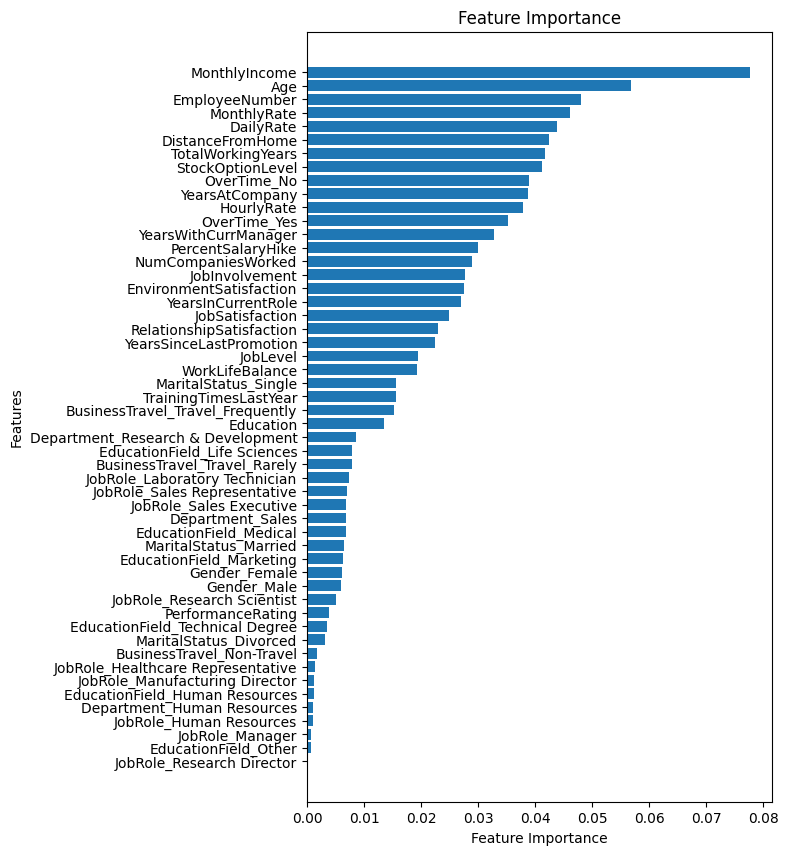

In [47]:
# Sort the feature importances and corresponding columns
sorted_indices = sorted(range(len(best_model.feature_importances_)), key=lambda i: best_model.feature_importances_[i])
sorted_columns = [columns[i] for i in sorted_indices]
sorted_feature_importances = [best_model.feature_importances_[i] for i in sorted_indices]

# Set the size of the plot
plt.figure(figsize=(6, 10))

# Plot horizontal bar chart
plt.barh(sorted_columns, sorted_feature_importances)

# Add labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# Show plot
plt.show()
